# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'samples/train.p'
testing_file = 'samples/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

Based on the above understanding of the dataset, below further load sizes, coodrs and 
the mapping between label id to its description.

In [2]:
sizes_train, coords_train = train['sizes'], train['coords']
sizes_test, coords_test = test['sizes'], test['coords']
import csv

with open('signnames.csv', newline='') as f:
    reader = csv.DictReader(f)
    sign_id_to_name = {int(row['ClassId']): row['SignName'] for row in reader}

The first dimension of features should be the count of samples, while the second, the third are the width, and height of image, respectively. The labels, sizes, coods have the same dimension as the corresponding features. They are associated with the corresponding features. 

Sign_id_to_name provides mapping to all the signs, thus it's cardinality is the number of signs. 

In [3]:
import numpy as np

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(sign_id_to_name)

input_depth = 3
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

The following routines mechanize the display of all kinds of traffic sign samples. 

In [5]:
def plot_sign(image, annotations):
    plt.title(annotations['title'])
    plt.ylabel(str.format('Original size: {}', annotations['size_original']))
    plt.xlabel(str.format('Coordinates at the original: {}', annotations['position_original']))
    plt.imshow(image)

def sign_indices(labels, sign_map):
    indices = []
    for sign_id in sign_map.keys():
        index = -1
        for j in range(index+1, len(labels)):
            if labels[j] == sign_id:
                index = j
                indices.append(index)
                break
    return indices

Show the sample of all kinds of traffic signs in the training and testing sets, in order to understand the visual appearance of the samples:

In [6]:
Features = {}
Features['train'] = X_train
Features['test'] = X_test

Labels = {}
Labels['train'] = y_train
Labels['test'] = y_test

Sizes = {}
Sizes['train'] = sizes_train
Sizes['test'] = sizes_test

Coords = {}
Coords['train'] = coords_train
Coords['test'] = coords_test

indices_train, indices_test = [sign_indices(Labels[t], sign_id_to_name) for t in ['train', 'test']]

def sample_images(features, labels, sizes, coords, kind='train'):
    indices = sign_indices(Labels[kind], sign_id_to_name)
    images_and_annotations = [[Features[kind][id],
                               {'title': sign_id_to_name[Labels[kind][id]],
                                'size_original': Sizes[kind][id], 
                                'position_original': Coords[kind][id]}] for id in indices]
    return images_and_annotations

i_and_a_train, i_and_a_test = [sample_images(Features[t], Labels[t], Sizes[t], Coords[t], kind = t) 
                               for t in ['train', 'test']]

k = max(len(i_and_a_train), len(i_and_a_test))

Below a full set of traffic sign samples from both the training and testing set. The left is from the training, and the right from the testing.

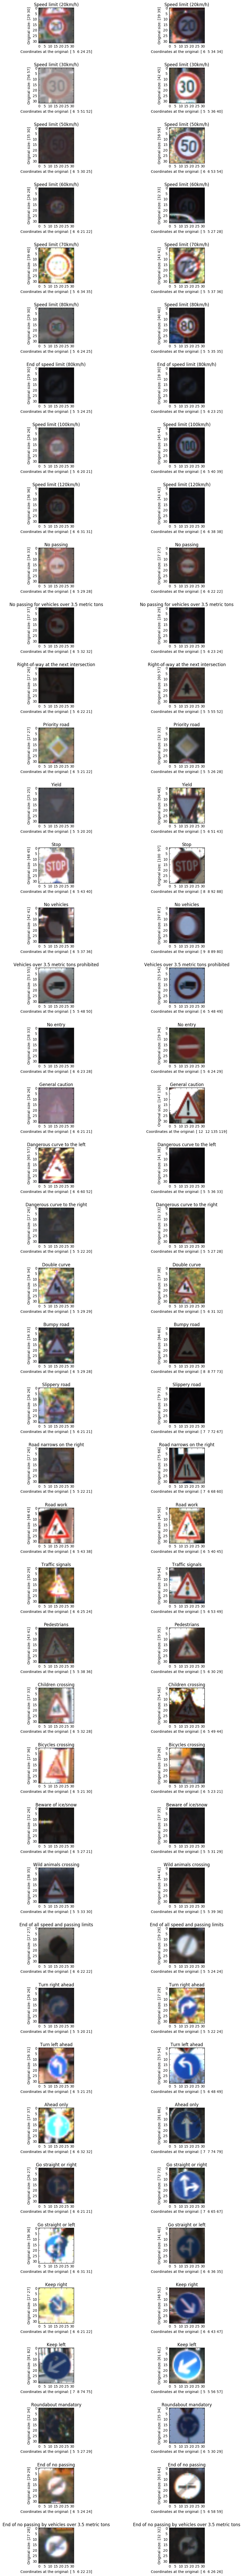

In [7]:
f,axarr=plt.subplots(nrows=k, ncols=2, figsize=(11,k*3), sharex=True, sharey=True)
plt.subplots_adjust(wspace = 0.5, hspace = 0.7)

for i in range(k):
    image, annotations = i_and_a_train[i]
    plt.subplot(k, 2, i*2+1)
    plot_sign(image, annotations)

    image, annotations = i_and_a_test[i]
    plt.subplot(k, 2, (i+1)*2)
    plot_sign(image, annotations)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Here are some potential ways to preprocess the sample data. 

1. Normalize the color image to remove the variations in lighting conditions.
2. Crop the image so that traffic sign can be more focused, and free from distratcion. 
3. Normalize the sample data to have 0 mean, and proper deviation. 

4. The sequence of the samples is reshuffled to make it random. 


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

**Answer:**

Split the train data to have validation data.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_depth, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
     
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Start with LeNet. Adapt it to the required dimensions, without preprocessing the input.

Need to deal with input of R, G, B, so the input depth should be 3. 

The final output should be the number of classes must be adapted to be n_classes, which is defined as n_classes = len(sign_id_to_name)

All the rest remains up to this moment. 

With the minimum change to LeNet, and the raw input without pre-processing, the learning curves show very slow progress, and seems remain very low accuracies for both training and cross-validation. This may suggest that the network may suffer from under-fitting, that the input is too complex to learn. The next action is to do more pre-processing to make the input less challenging. 

The output of the first layer, the depth may need to be increased to account for much more complex features. The original was 6. I'll set it to be 108 based on my understanding of LeCunn's paper.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.

Try to increase the BATCH_SIZE from 128 to 10000, as I still have much memory available, 8GB, with BATCH_SIZE 128.

Also try to increase the EPOCHS from 10, as it progresses slowly. 

After reading https://carnd-forums.udacity.com/questions/32112911/increasing-batch-size-results-in-failure-to-converge.-really-strange I realized that by increasing BATCH_SIZE from 128 to 10000, I have reduced the training times by about 100 times, so I must increase EPOCHS by about 100 times to be equivalent in terms of trainings. So I did experiement with 

BATCH_SIZE = 10000
EPOCHS = 10*(math.floor(BATCH_SIZE/128))

Upon observation, it indeed solved the problem not making progress, and it seems that EPOCH = 250 to 300 would be sufficient, as the training accuracy reaches 1.00 at 248. 

In [23]:
import math
BATCH_SIZE = 10000
EPOCHS = 300

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

Try to increase the learning rate, as it seems at the 0.001, the performance starts poorly, except the first time learning, and always progress very slowly.

With learning rate set 0.01, all the other conditions being the same as above, the performance is even worst. The training and validation accuracy stays at about 0.05, not learned at all. So reduce the learning rate from 0.01 to 0.007.

With learning rate 0.007, all the other conditions being the same as above, the performance is even worst. The training and validation accuracy stays at about 0.005, not learned at all. So reduce the learning rate from 0.007 to 0.001.

Per https://carnd-forums.udacity.com/questions/12619143/one-reason-for-low-accuracy-ill-conditioned-value-for-log-calculation, when the logits are too small, there might be numerical computation instability, to avoid that, add 

logits = tf.clip_by_value(logits, 1e-10, 1.0)

below.

Adding numerical stability does not help at all. The accuracy does not improve at all, remaining at 0.008, and 0.009, respectively for training and validation. I suspect that there is some serious mistake in the implementation. 

In [14]:
rate = 0.001

logits = LeNet(x)
#logits = tf.clip_by_value(logits, 1e-10, 1.0) # added to improve numerical stability. 

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Training...

EPOCH 1 ...
Training Accuracy = 0.043
Validation Accuracy = 0.042

EPOCH 2 ...
Training Accuracy = 0.071
Validation Accuracy = 0.071

EPOCH 3 ...
Training Accuracy = 0.072
Validation Accuracy = 0.071

EPOCH 4 ...
Training Accuracy = 0.069
Validation Accuracy = 0.064

EPOCH 5 ...
Training Accuracy = 0.076
Validation Accuracy = 0.072

EPOCH 6 ...
Training Accuracy = 0.097
Validation Accuracy = 0.094

EPOCH 7 ...
Training Accuracy = 0.124
Validation Accuracy = 0.123

EPOCH 8 ...
Training Accuracy = 0.147
Validation Accuracy = 0.145

EPOCH 9 ...
Training Accuracy = 0.170
Validation Accuracy = 0.170

EPOCH 10 ...
Training Accuracy = 0.197
Validation Accuracy = 0.196

EPOCH 11 ...
Training Accuracy = 0.226
Validation Accuracy = 0.227

EPOCH 12 ...
Training Accuracy = 0.260
Validation Accuracy = 0.261

EPOCH 13 ...
Training Accuracy = 0.295
Validation Accuracy = 0.295

EPOCH 14 ...
Training Accuracy = 0.322
Validation Accuracy = 0.322

EPOCH 15 ...
Training Accuracy = 0.349
Valid

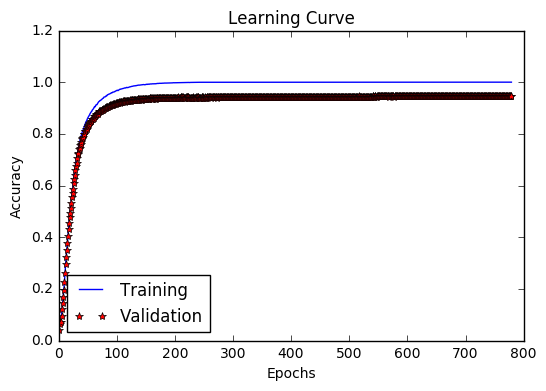

In [24]:
epochs = []
accuracies_training = []
accuracies_validation = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_validation, y_validation)
        
        epochs.append(i)
        accuracies_training.append(training_accuracy)
        accuracies_validation.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")
    
plt.plot(epochs, accuracies_training,'b-', label="Training")
plt.plot(epochs, accuracies_validation, 'r*', label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc='best') # place legend to avoid overlapping with curves.

In [25]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.842


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Use the LeNet's implementation for now. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

With minimum adaptation from LeNet (just changing the input depth to 3, and the number of classes 43), with sufficient training epochs, the training accuracy reaches 1.0, and validation accuracy 0.946. This shows that LeNet fundamentally has the capacity to learn the task of classifying the traffic signs. It seems suffering from overfitting. 

Recall, that there is much variations in the input images. Next, I decide to do zero-mean nomalization to see if it would help to improve on the validation accuracy. As the implemenatation of the normalization seems not triavial, and I realize that a color space adaptation would achieve the effect including the normalization. 

So I decide to do the color adaptation first. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [19]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.